# Il clustering
Il clustering è un problema dell'apprendimento non supervisionato, la classe di problemi affrontati dal machine learning in cui non abbiamo a disposizione dei dati di esempio per l'addestramento di un modello.
Il clustering è molto simile alla classificazione, l'unica differenza è che gli esempi non sono labellizati, quindi bisogna trovare una strada alternativa per raggruppare gli esempi in classi (clusters)<br>

# k-means
Il k-means è un metodo che affronta il problema del clustering in maniera molto semplice.
 1. Scegliamo un numero k di clusters in cui vogliamo dividere il dataset.
 2. Scegliamo casualmente k centroidi.
 3. Per ogni esempio nel dataset, utilizziamo una metrica di distanza (come la distanza euclidea) per assegnare l'apparteneza di un esempio al cluster rappresentato dal centroide più vicino.
 4. Ricalcoliamo i centroidi come i punti medi per ogni cluster.
 5. Se almeno un esempio ha cambiato cluster ripetiamo tornando al punto 3, altrimenti il modello è pronto.
 
In questo notebook utilizzeremo il k-means per raggruppare in clusters un dataset creato da noi.
<br><br>
Importiamo matplotlib e seaborn per visualizzare il dataset.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (14, 10)
sns.set()

Utilizziamo la funzione <span style="font-family: Monaco">make_blobs</span> di scikit-learn per creare un dataset composto da 500 esempi.

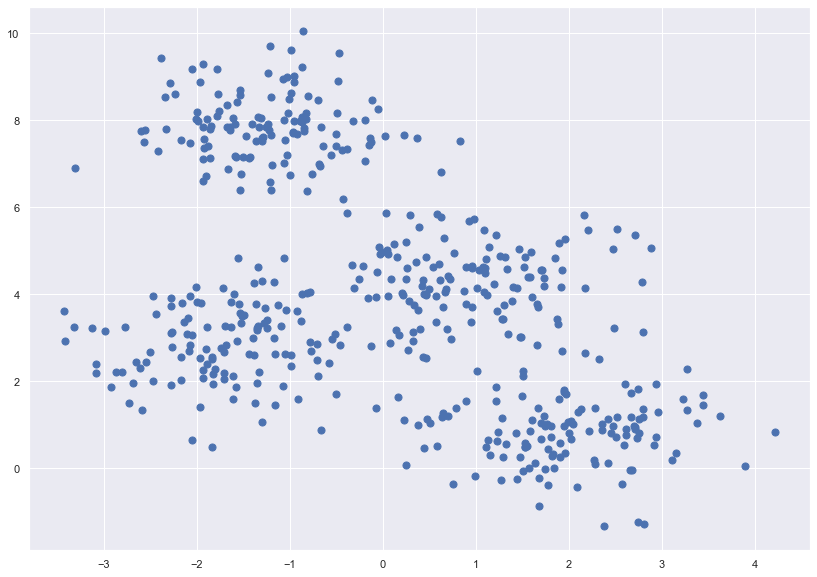

In [4]:
from sklearn.datasets import make_blobs

X, y_true = make_blobs(n_samples=500, centers=4,
                       cluster_std=.8, random_state=0)

plt.scatter(X[:, 0], X[:, 1], s=50);

Adesso utilizziamo la classe <span style="font-family: Monaco">KMeans</span> di scikit-learn per creare i nostri clusters, il numero di cluster da ricercare va specificato a priori e va fatto all'interno del parametro <span style="font-family: Monaco">n_clusters</span>.

In [5]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Visualizziamo il risultato del k-means e mostriamo su grafico anche i centroidi finali

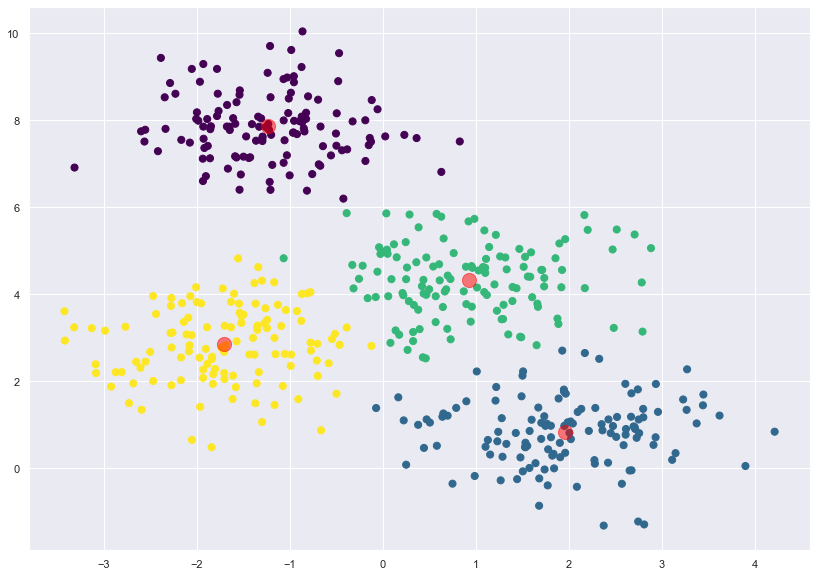

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5);

## Determinare il numero di Clusters
Nell'esempio abbiamo impostato il numero di clusters a 4 perché avendo creato noi il dataset conoscevamo già il numero esatto di clusters.<br>
In casi reali, in cui il valore corretto è sconosciuto, possiamo stimarlo confrontando la somma dei quadrati delle distanze per modelli ottenuti con diversi valori di k.<br>

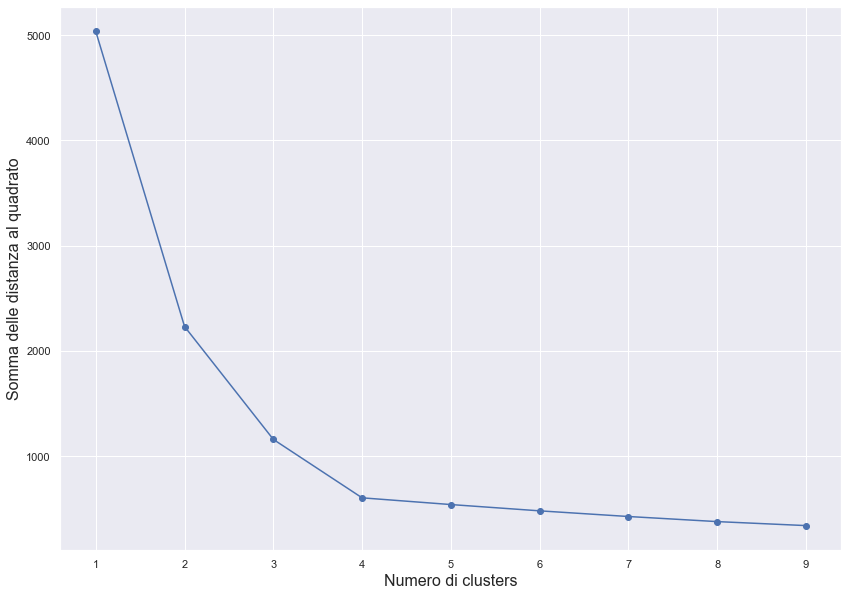

In [7]:
sse = {}
for k in range(1, 10):
    kmeans = KMeans(init="k-means++", n_clusters=k).fit(X)
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()),marker='o')
plt.xlabel("Numero di clusters", fontsize=16)
plt.ylabel("Somma delle distanza al quadrato", fontsize=16)
plt.savefig("number_of_k.png")
plt.show()

Per determinare il valore di k possiamo utilizzare **l'elbow method**, che ci dice che il valore da scegliere è quello in cui si osserva il cambiamento di velocità nel grafico.</br>
In questo caso il valore di k indicato dall'elbow method è 4.